Введите период: 
8.9


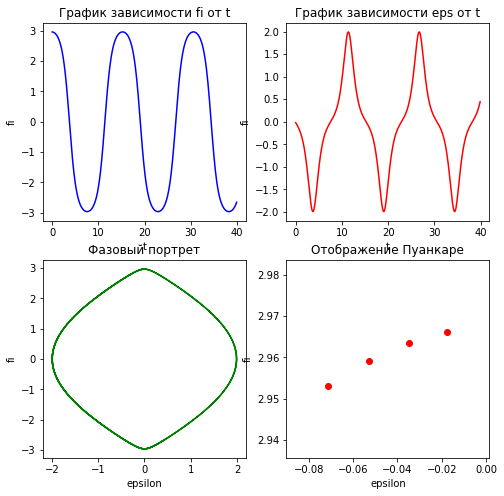

In [1]:
# Нужные модули
import math
import matplotlib.pyplot as plt
# Исходные данные
w0 = 1
g = 0
A0 = 0
w = 0.67
fi0 = 170 * math.pi / 180
epsilon0 = 0
h = 0.1
fi = fi0
epsilon = epsilon0
# Метод Рунге-Кутты
def newState(t, fi, epsilon):
    def f1(_t, _fi, _epsilon):
        return -w0 * w0 * math.sin(_fi) - 2 * g * _epsilon + A0 * math.cos(w * _t)
    def f2(_epsilon):
        return _epsilon

    q0 = f1(t, fi, epsilon)
    k0 = f2(epsilon)

    q1 = f1(t + h / 2, fi + k0 * h / 2, epsilon + q0 * h / 2)
    k1 = f2(epsilon + q0 * h / 2)

    q2 = f1(t + h / 2, fi + k1 * h / 2, epsilon + q1 * h / 2)
    k2 = f2(epsilon + q1 * h / 2)

    q3 = f1(t + h, fi + k2 * h, epsilon + q2 * h)
    k3 = f2(epsilon + q2 * h)

    epsilon += h / 6 * (q0 + 2 * q1 + 2 * q2 + q3)
    fi += h / 6 * (k0 + 2 * k1 + 2 * k2 + k3)

    res = []
    res.append(epsilon)
    res.append(fi)
    return res  

t = 0
tArray = []
fiArray = []
epsilonArray = []
while (t < 40):
    res = []
    res = newState(t, fi, epsilon)
    fi = res[1]
    epsilon = res[0]
    tArray.append(t)
    fiArray.append(fi)
    epsilonArray.append(epsilon)
    t += h

plt.figure(1, figsize=(8, 8))

# График зависимости fi от t
plt.subplot(2, 2, 1)
plt.plot(tArray, fiArray, color = 'b')
plt.title("График зависимости fi от t")
plt.xlabel('t')
plt.ylabel('fi')

# График зависимости eps от t
plt.subplot(2, 2, 2)
plt.plot(tArray, epsilonArray, color = 'r')
plt.title("График зависимости eps от t")
plt.xlabel('t')
plt.ylabel('fi')

# График зависимости epsilon от fi
plt.subplot(2, 2, 3)
plt.plot(epsilonArray, fiArray, color = 'g')
plt.title("Фазовый портрет")
plt.xlabel('epsilon')
plt.ylabel('fi')

fi = fi0
epsilon = epsilon0
fiArray = []
epsilonArray = []
print("Введите период: ")
t = float(input())
n = 4
for i in range(n):
    res = []
    res = newState(i * t, fi, epsilon)
    fi = res[1]
    epsilon = res[0]
    fiArray.append(fi)
    epsilonArray.append(epsilon)

# Отображение Пуанкаре
plt.subplot(2, 2, 4)
plt.scatter(epsilonArray, fiArray, color = 'r')
plt.title("Отображение Пуанкаре")
plt.xlabel('epsilon')
plt.ylabel('fi')
plt.show()